In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Some online dating service advertises matching users on over 32 dimensions of compatibility. Let's try 5.

Please fill out the following brief survey. Choose an identifier (fake name) to remain anonymous yet be able to recognize yourself. 

In [2]:
from itertools import combinations

In [68]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo8Y7wh33vZv9uYdewzwASSfYXQsPEGWldt_lWk8MPBYnBxKprcysZ-u9hjqPIWIeqndB4f-U1oAoM/pub?gid=1201323166&single=true&output=csv"
responses = pd.read_csv(url)
qs = ['Gazpacho', 'Wrestling',
       'Driver', 'Socks',
       'Halloween']
responses.columns = ['Timestamp', 'Name'] + qs
responses

,Timestamp,Name,Gazpacho,Wrestling,Driver,Socks,Halloween
0,1/27/2020 16:38:26,Drake,6,4,7,0,6
1,1/27/2020 16:38:50,Shaggy,9,9,1,5,8
2,1/27/2020 16:39:20,Björn Borg,3,8,8,8,10
3,1/27/2020 17:02:16,Tin Man,1,0,10,0,3
4,1/27/2020 17:02:42,Dorothy,10,0,10,3,8


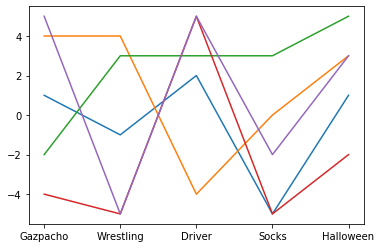

In [76]:
answers = responses[qs].to_numpy() - 5
plt.plot(np.transpose(answers));
plt.xticks(ticks=range(5),labels=qs);
# plt.legend(responses.Name,loc='upper right');

In [79]:
from numpy import dot,arccos #dot product, arccos
from numpy.linalg import norm # this is the magnitude function

out = []
for x,y in combinations(responses.index,2):
    xinfo,yinfo = responses.loc[[x,y],qs].to_numpy() - 5
#     print (xinfo,yinfo,dot(xinfo,yinfo))
    compat = dot(xinfo,yinfo)/(norm(xinfo)*norm(yinfo))
    out.append([responses.loc[x,"Name"],responses.loc[y,"Name"],compat])

results = pd.DataFrame(out,columns=["Name1","Name2","Compat"]).sort_values("Compat",ascending=False)

In [80]:
results

,Name1,Name2,Compat
3,Drake,Dorothy,0.621867
2,Drake,Tin Man,0.616655
9,Tin Man,Dorothy,0.371857
4,Shaggy,Björn Borg,0.123899
8,Björn Borg,Dorothy,-0.014245
0,Drake,Shaggy,-0.117073
6,Shaggy,Dorothy,-0.155315
1,Drake,Björn Borg,-0.212605
7,Björn Borg,Tin Man,-0.233074
5,Shaggy,Tin Man,-0.842544
